In [1]:
#Import Necessary libraries


import numpy as np, pandas as pd, matplotlib.pyplot  as plt, seaborn as sns
import datetime
from  matplotlib.ticker import FuncFormatter
%matplotlib inline 
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [2]:
# Import the raw data

bike = pd.read_csv('day.csv')

In [3]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Data Analysis:
- Get Row x Column count
- Check for Null 
- Check Object data (date Validation)

In [5]:
print(bike.shape)
print()
print(bike.info())
print()

# Extract Column list before dropping fields
col_list_0_init = bike.columns.tolist()
print(col_list_0_init)
print()

#Chkdate = pd.to_datetime(bike["dteday"], format="%d-%m-%Y", errors="coerce")

#if Chkdate.notnull().all():
#    print('Dates are valid')
#else: 
#    print('Below date entries got issues')
#    print( bike.loc[Chkdate.isna(), "dteday"])

(730, 16)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB
None

['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'working

### Observation: 
 - **Date field got valid values.**
 - **There are no Null values in any Fields.**
 - Target Variable: Bike Rider 'cnt' is Integer.  (Casual, Registered counts could be dropped after EDA)
 - Continuous Variables: Wind Speed, Humidity, Temp are Floats.

In [6]:
for i in bike.columns:
    print(i, bike[i].nunique())

instant 730
dteday 730
season 4
yr 2
mnth 12
holiday 2
weekday 7
workingday 2
weathersit 3
temp 498
atemp 689
hum 594
windspeed 649
casual 605
registered 678
cnt 695


### Observation: 
- **Year (2), Season (4), Month (12), Week day (7), Working Day (Yes/No), Holiday (Yes/No) values are valid data
- **Weather Type is distributed only across 3 levels, though 4 types are listed in the data dictionary. Maybe Severe weather means No bike riders**

### Plot the difference between Temp and 'Temp it feels like' to see if one of them can be removed from the model

C:\Users\kcnl843\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

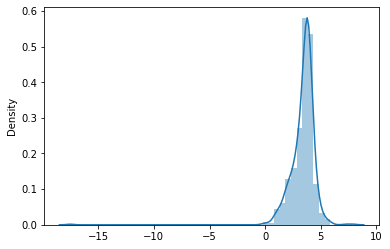

In [7]:
sns.distplot(bike['atemp']-bike['temp'])

### Observation: 
- **Drop instant field as its a running index number. temp can be dropped as Feeling Temp 'atemp' is available and more relevant than Temp to guess whether a bike rider will ride/not that day**
- **Temp and ATemp (Temp it Feels like) are close. 'ATemp' is 3 degress higher than Temp on an average. High Correlation. Hence one of these fields to be removed**

In [8]:
bike.drop(['instant','temp'], inplace=True, axis=1)
print(bike.shape)
print()

(730, 14)



### Data Analysis:
- Analyze data distribution (# of rows) across Year, Weather Type, Season, Month, Week Day, Working Day, Holiday

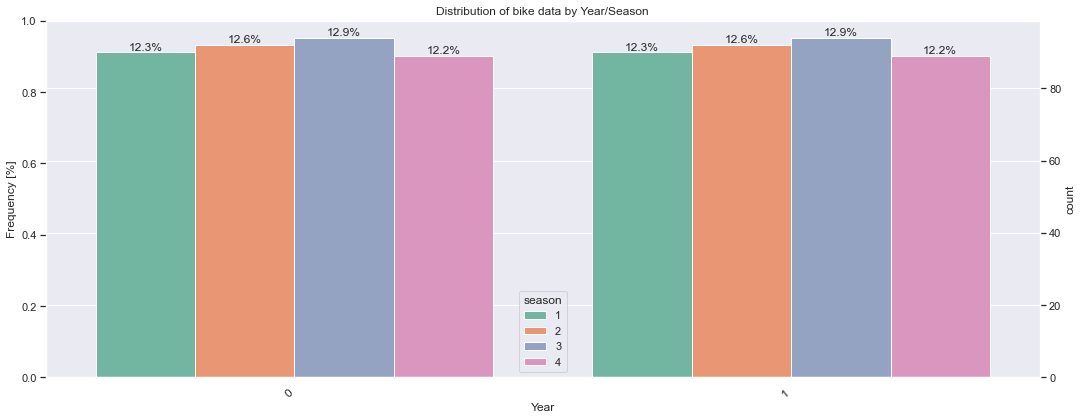

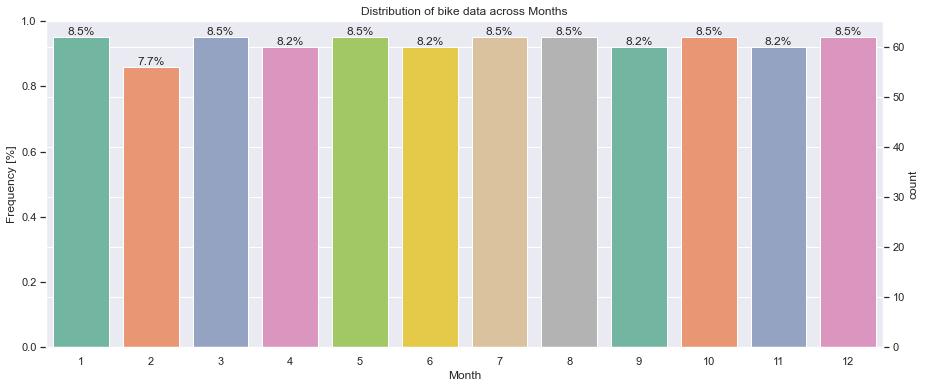

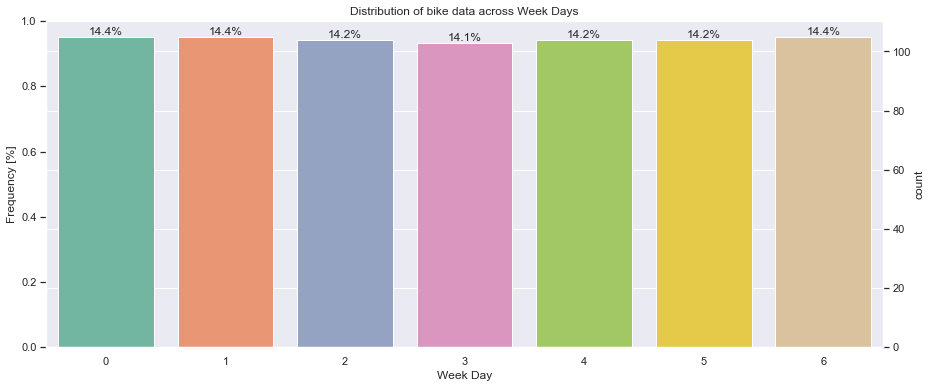

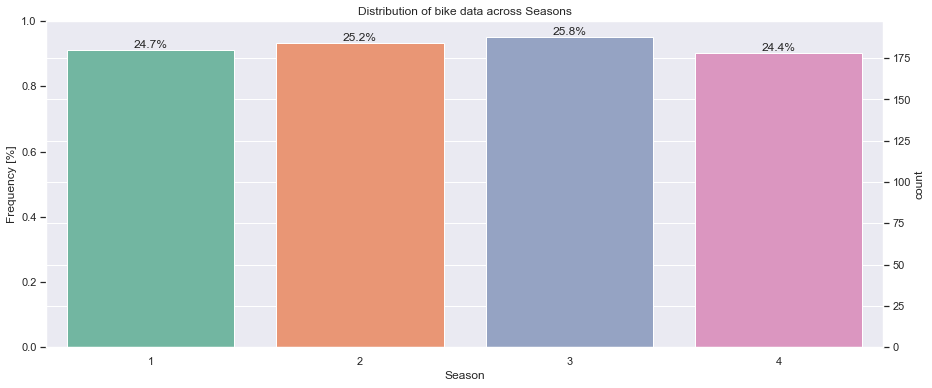

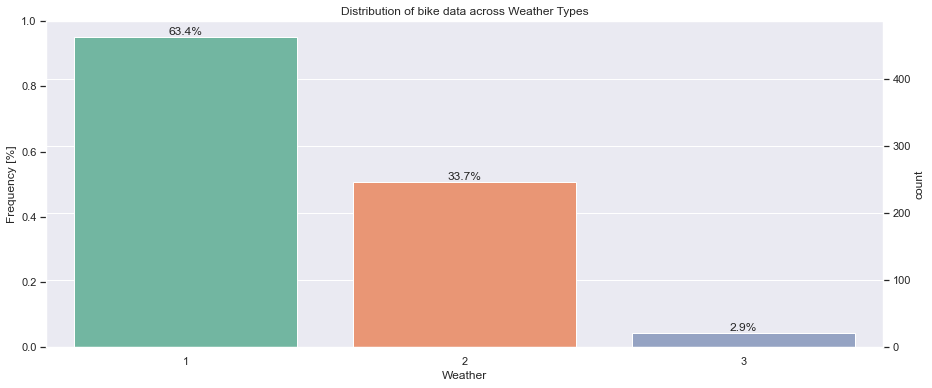

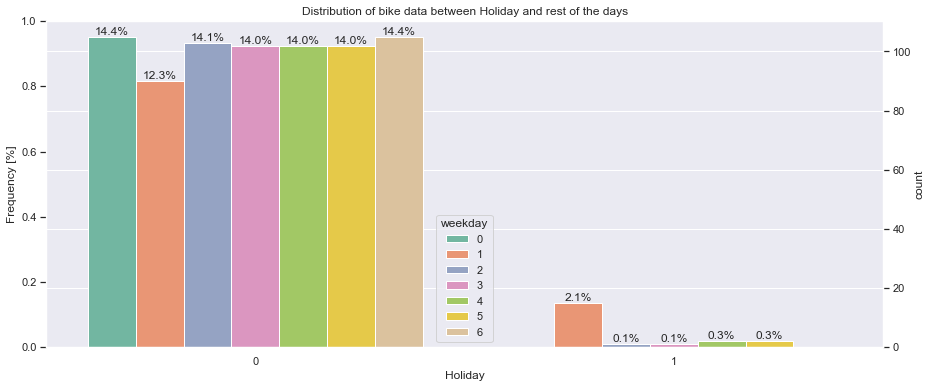

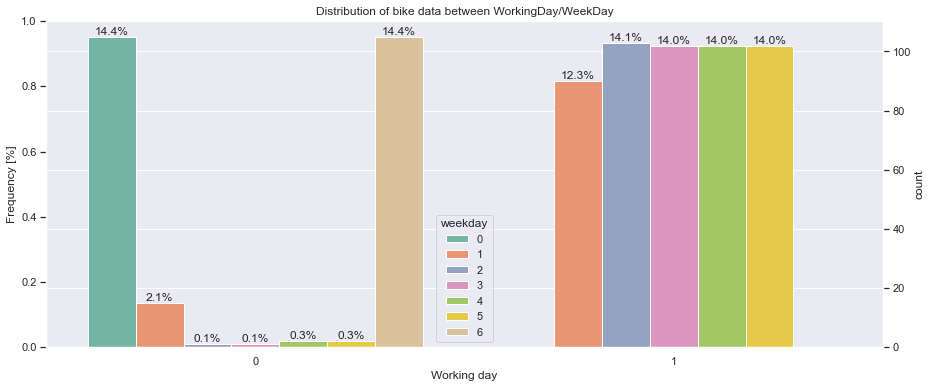

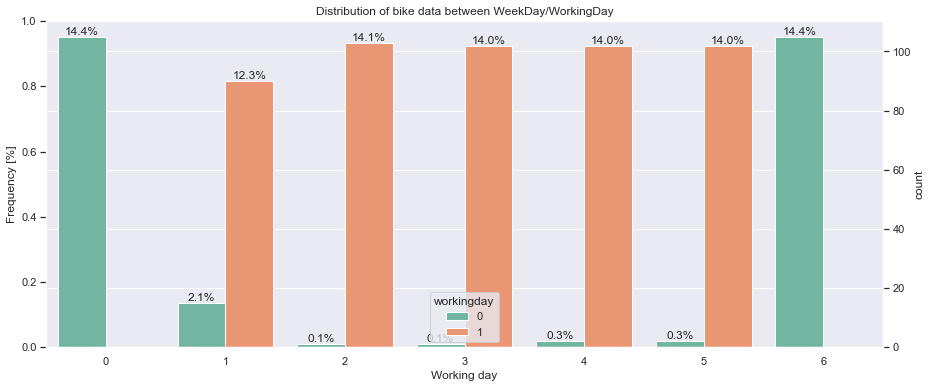

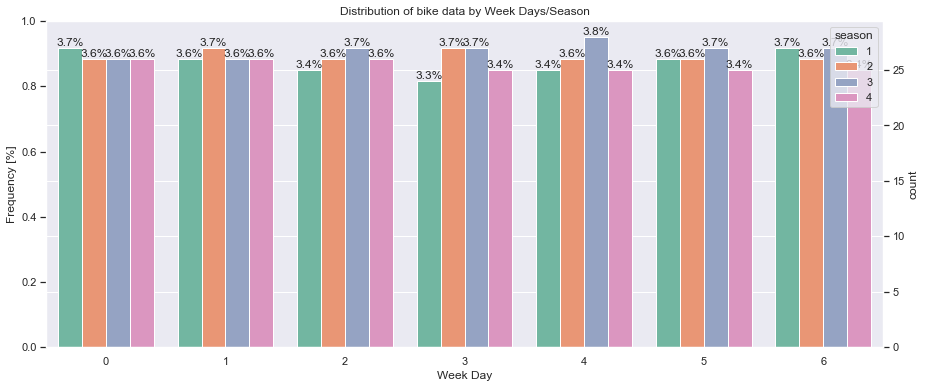

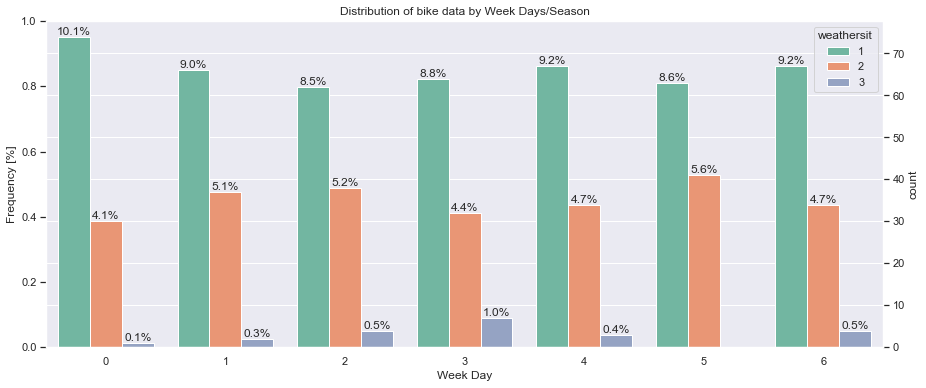

In [9]:
sns.set(style="darkgrid")
def plt_freq(x_var,data_df,x_label,title,hue_var=None,rot_flag=0,fig_size_x=15,fig_size_y=6):
    ncount = len(bike)
    dims = (fig_size_x,fig_size_y)
    plt.figure(figsize=dims)
    ax = sns.countplot(x=x_var, data=data_df, hue= hue_var , palette="Set2")
    plt.title(title)
    plt.xlabel(x_label)

    # Make twin axis
    ax2=ax.twinx()

    # Switch so count axis is on right, frequency on left
    ax2.yaxis.tick_left()
    ax.yaxis.tick_right()

    # Also switch the labels over
    ax.yaxis.set_label_position('right')
    ax2.yaxis.set_label_position('left')
    if(rot_flag==1):
        ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=12)
        plt.tight_layout()
    ax2.set_ylabel('Frequency [%]')

    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
                ha='center', va='bottom') # set the alignment of the text

    # Need to turn off ax2 grid, to avoid overlap of gridlines on top of the bars
    ax2.grid(None)
    
plt_freq("yr",bike,'Year','Distribution of bike data by Year/Season',"season",1)
plt_freq("mnth",bike,'Month','Distribution of bike data across Months')
plt_freq("weekday",bike,'Week Day','Distribution of bike data across Week Days')
plt_freq("season",bike,'Season','Distribution of bike data across Seasons')
plt_freq("weathersit",bike,'Weather','Distribution of bike data across Weather Types')
plt_freq("holiday",bike,'Holiday','Distribution of bike data between Holiday and rest of the days','weekday')
plt_freq("workingday",bike,'Working day','Distribution of bike data between WorkingDay/WeekDay','weekday')
plt_freq("weekday",bike,'Working day','Distribution of bike data between WeekDay/WorkingDay','workingday')
plt_freq("weekday",bike,'Week Day','Distribution of bike data by Week Days/Season',"season")
plt_freq("weekday",bike,'Week Day','Distribution of bike data by Week Days/Season',"weathersit")

### Create Dummy Variable on Weather, Season, Week as they are Categorical variables with Numerical values

### Observation:
- Off the 4 Weather types mentioned in the data dictionary, there are values for only 3 Weather types. Future Test data might contain this 4th (missing) weather type. But we will build a model to predict based on the available data

In [10]:
bike['weather_name'] = bike['weathersit'].map({1:'clear',2:'mist',3:'rain',4:'heavyrain'})
w_name = pd.get_dummies(bike['weather_name'] , drop_first= True)
bike = pd.concat([bike,w_name], axis=1)

In [11]:
bike['season_name'] = bike['season'].map({1:'spring',2:'summer',3:'fall',4:'winter'})
s_name = pd.get_dummies(bike['season_name'], drop_first= True) 
bike = pd.concat([bike,s_name], axis=1)

In [12]:
bike['week_name'] = bike['weekday'].map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})
w_name = pd.get_dummies(bike['week_name'], drop_first= True)
bike = pd.concat([bike,w_name], axis=1)

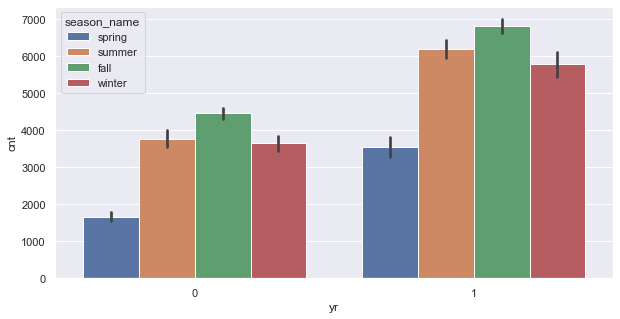

In [13]:
plt.figure(figsize=(10,5))
sns.barplot(data=bike,x='yr', y='cnt', hue = bike.season_name, palette="deep")
plt.show()

#### Observation: 
- **Spring season performance is significantly low compared to the other seasons**
- There is significant increase in user count for the 2nd Year. So this will help with the prediction

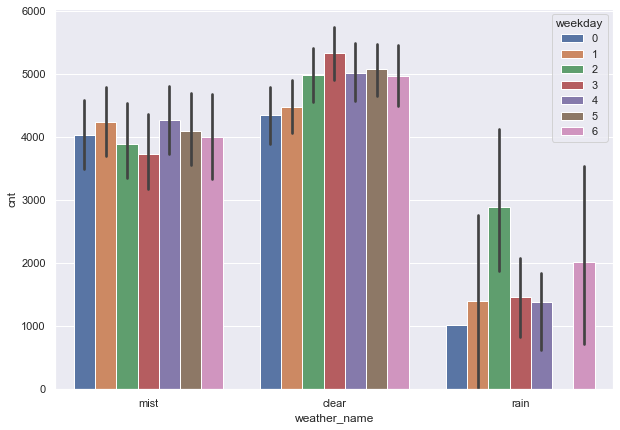

In [14]:
plt.figure(figsize=(10,7))
sns.barplot(data =bike,x='weather_name', y='cnt', hue ='weekday',palette="deep")
plt.show()

## Assumption: 
- While analysing the Week Day and Working day chart it appears that Week starts with Sunday (week day Zero) and ends with Saturday (week day Six). 
- Week day 1 to 5 are marked as Working days as per the chart - **"Distribution of bike data between WeekDay/WorkingDay".**
- We have complete data for all 365 days for both years

## Observation:
- **Above bar chart shows that When Weather is 'Slight Snow / Rain' (Weather Type - 3) and the day is also a Friday, then there are No bike riders (Both Casual and Registered)**
- **If weather is 'Snow/Ice/Heavy Rain' (Weather Type - 4) then there are No bike Riders**

### Feature Engineering: 

- Add "Casual to Registered" User Ratio. This could help with the prediction

In [15]:
bike['CR_ratio'] = bike['casual']/bike['registered']

In [16]:
bike.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,...,spring,summer,winter,mon,sat,sun,thu,tue,wed,CR_ratio
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,...,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,23.726322,62.765175,12.763620,...,0.246575,0.252055,0.243836,0.143836,0.143836,0.143836,0.142466,0.142466,0.141096,0.237795
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,8.150308,14.237589,5.195841,...,0.431313,0.434490,0.429689,0.351164,0.351164,0.351164,0.349767,0.349767,0.348359,0.191068
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,3.953480,0.000000,1.500244,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.013353
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,16.889713,52.000000,9.041650,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.110513
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,24.368225,62.625000,12.125325,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.174887
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,30.445775,72.989575,15.625589,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.274001
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,42.044800,97.250000,34.000021,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.042166


## Observation:
- Rider Count increases with Temperature till 30 Degree Centigrade 

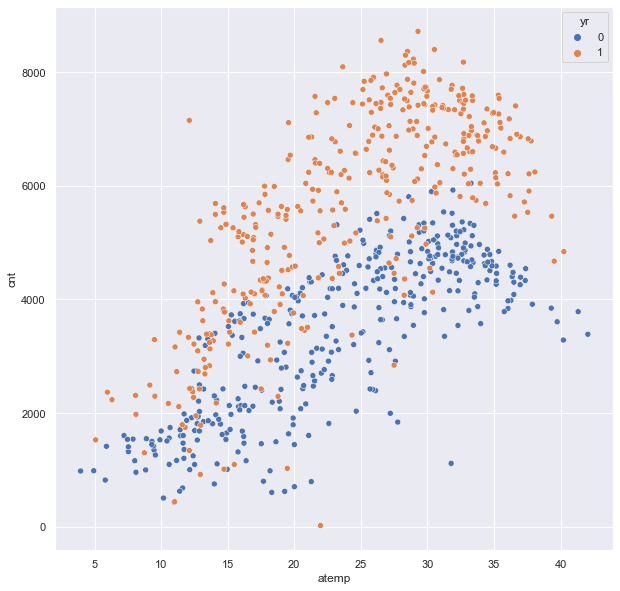

In [17]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=bike.atemp,y=bike.cnt, data=bike,hue=bike.yr)
plt.show()

### Avg # of riders have increased significantly in the 2nd year as seen in the box plot below

<AxesSubplot:xlabel='yr', ylabel='cnt'>

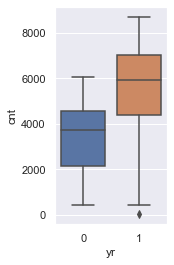

In [18]:
#instead of seaborn using matlibplot to combine 2 datasets in one boxplot
plt.figure(figsize=(2,4))
#bike['cnt'] = bike['registered'] + bike['casual']
#data = [bike[bike['yr'] == 0].cnt, bike[bike['yr'] == 1].cnt]
#plt.boxplot(data,notch ='True')

sns.boxplot(x=bike.yr, y=bike.cnt)

## Casual to Registered Ratio: Casual count is a third of the Registered count for 75 percentile of the data

<AxesSubplot:xlabel='yr', ylabel='CR_ratio'>

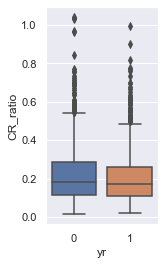

In [19]:
plt.figure(figsize=(2,4))
sns.boxplot(x=bike.yr, y=bike.CR_ratio)

### Wind Speed, Humidity has few values that are uncommon. But they need not be classified as Outliers

<AxesSubplot:xlabel='yr', ylabel='atemp'>

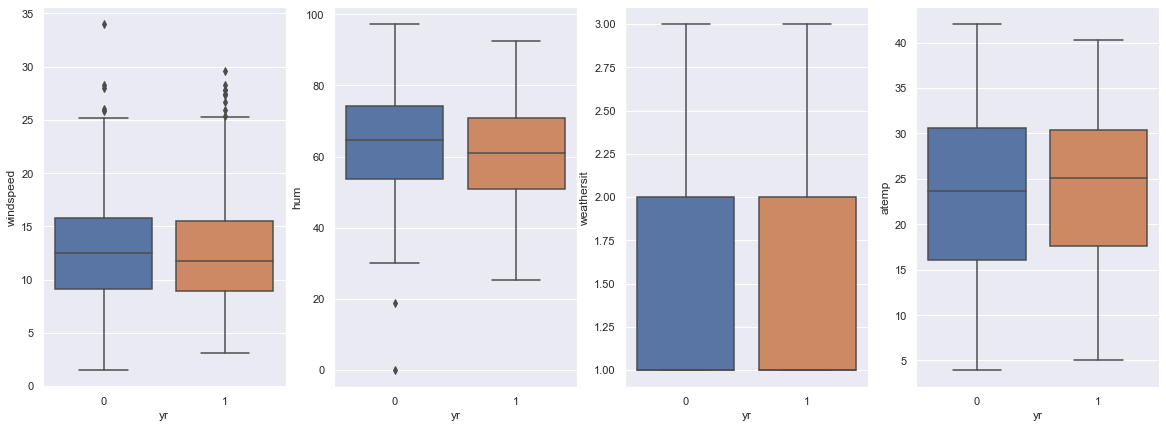

In [20]:
plt.figure(figsize=(20,7))
plt.subplot(1,4,1)
sns.boxplot(y=bike.windspeed,x=bike['yr'],data=bike)
plt.subplot(1,4,2)
sns.boxplot(y=bike.hum,x=bike['yr'],data=bike)
plt.subplot(1,4,3)
sns.boxplot(y=bike.weathersit,x=bike['yr'],data=bike)
plt.subplot(1,4,4)
sns.boxplot(y=bike.atemp,x=bike['yr'],data=bike)

In [21]:
bike.columns

Index(['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'atemp', 'hum', 'windspeed', 'casual', 'registered',
       'cnt', 'weather_name', 'mist', 'rain', 'season_name', 'spring',
       'summer', 'winter', 'week_name', 'mon', 'sat', 'sun', 'thu', 'tue',
       'wed', 'CR_ratio'],
      dtype='object')

## Linearity Analysis ( differentiating between the 2 years )

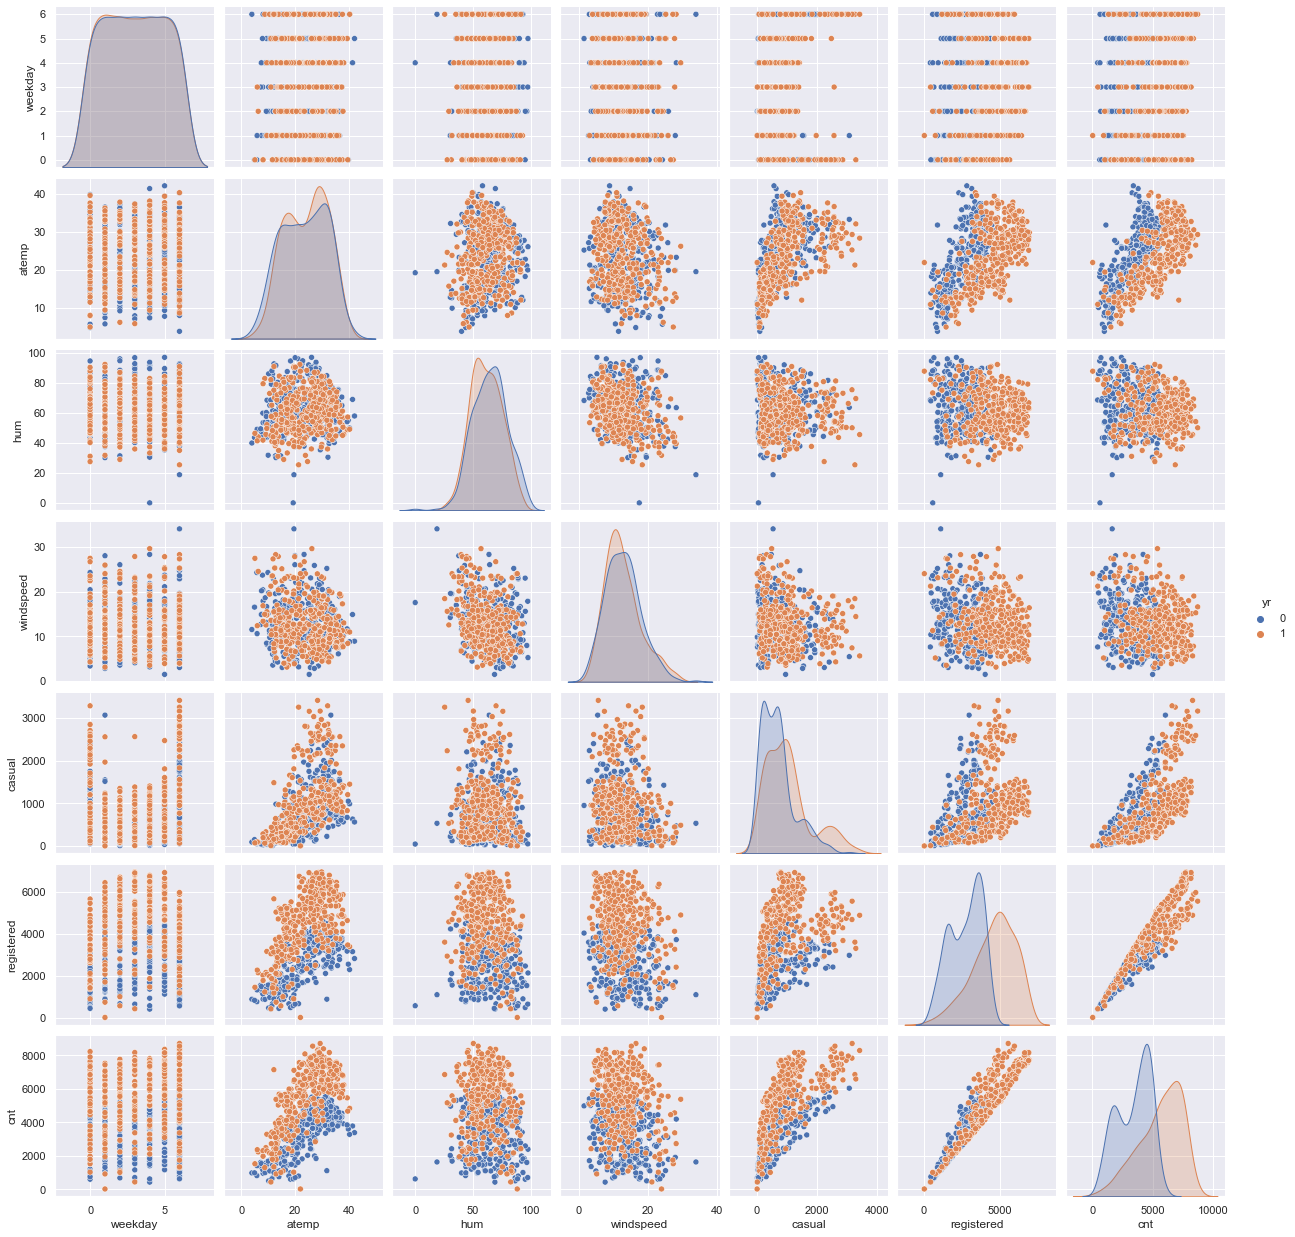

In [22]:
bike_ind_var = bike[['yr','weekday',  'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']]

bike_ind_var.shape

sns.pairplot(bike_ind_var,hue='yr')
plt.show()

### Observation: 
- Registered User Count is showing very good linearity with the target variable Bike rider Count

## Drop these independent variables after EDA

In [23]:
bike.drop(['weathersit','weather_name','dteday','season','season_name','weekday','week_name','mnth','casual', 'registered'], inplace=True, axis=1)
print(bike.shape)
print()

(730, 19)



## Split data as ' Train ' and ' Test ' data

In [24]:
df_train, df_test = train_test_split(bike, train_size=0.7, random_state = 100 )
print(df_train.shape)
print(df_test.shape)

(510, 19)
(220, 19)


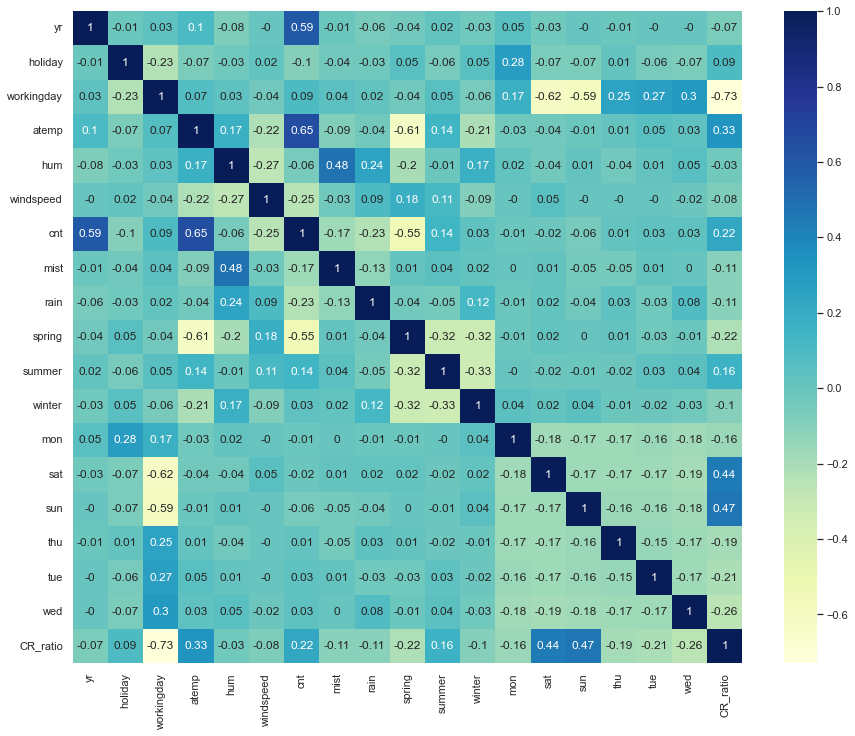

In [25]:
plt.figure(figsize=(15,12))
sns.heatmap(round(df_train.corr(),2), annot= True, cmap='YlGnBu')
plt.show()

## Observation: 
- Linearity Holds good based on the numeric variables analyzed so far. So we can use Linear Regression Model on this dataset. Need to check for multicollinearity.
- **When Wind speed, Humidity and Temp are favourable, Rider Count increases**

## Rescale the Numeric variables that are not Boolean
- Feature Scaling 

In [26]:
scaler = MinMaxScaler()
num_vars = ['atemp','hum','windspeed','cnt','CR_ratio']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

## Model fitting

In [27]:
y_train=df_train.pop('cnt')
X_train=df_train

In [28]:
df_train.describe()

,yr,holiday,workingday,atemp,hum,windspeed,mist,rain,spring,summer,winter,mon,sat,sun,thu,tue,wed,CR_ratio
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.513156,0.650480,0.320883,0.345098,0.029412,0.243137,0.247059,0.247059,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.216079
std,0.500429,0.157763,0.468282,0.212410,0.145846,0.169803,0.475867,0.169124,0.429398,0.431725,0.431725,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.184439
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.332086,0.538643,0.199179,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.093986
50%,1.000000,0.000000,1.000000,0.529718,0.653714,0.296763,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.156553
75%,1.000000,0.000000,1.000000,0.688457,0.754830,0.414447,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.257846
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [29]:
X_train.shape

(510, 18)

## Considering All Fields to start building the model and then eliminate the features that show multicollinearity

In [30]:
X_train_sm=sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     153.5
Date:                Wed, 09 Nov 2022   Prob (F-statistic):          3.69e-184
Time:                        11:14:15   Log-Likelihood:                 508.42
No. Observations:                 510   AIC:                            -980.8
Df Residuals:                     492   BIC:                            -904.6
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1801      0.029      6.206      0.000       0.123       0.237
yr             0.2416      0.008     29.040      0.000       0.225       0.258
holiday       -0.0069      0.024     -0.291      0.771      -0.053       0.039
workingday     0.1280      0.013     10.025      0.000       0.103       0.153
atemp          0.4155      0.037     11.356      0.000       0.344       0.487
hum           -0.1082      0.038     -2.843      0.005      -0.183      -0.033
windspeed     -0.1442      0.026     -5.516      0.000      -0.196      -0.093
mist          -0.0541      0.011     -5.074      0.000      -0.075      -0.033
rain          -0.2308      0.027     -8.584      0.000      -0.284      -0.178
spring        -0.0976      0.019     -5.093      0.000      -0.135      -0.060
summer         0.0127      0.013      0.953      0.341      -0.013       0.039
winter         0.0690      0.016      4.409      0.000       0.038       0.100
mon           -0.0216      0.016     -1.371      0.171      -0.053       0.009
sat            0.0597      0.014      4.344      0.000       0.033       0.087
sun           -0.0007      0.015     -0.050      0.960      -0.029       0.028
thu           -0.0060      0.016     -0.379      0.704      -0.037       0.025
tue           -0.0122      0.016     -0.765      0.445      -0.044       0.019
wed            0.0057      0.015      0.371      0.711      -0.025       0.036
CR_ratio       0.2424      0.042      5.838      0.000       0.161       0.324
==============================================================================
Omnibus:                      101.310   Durbin-Watson:                   2.071
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              292.391
Skew:                          -0.948   Prob(JB):                     3.22e-64
Kurtosis:                       6.188   Cond. No.                     6.70e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.47e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [31]:
X_train_sm.shape

(510, 19)

In [32]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range (X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,51.45
12,sat,13.39
13,sun,13.05
8,spring,4.17
3,atemp,3.72
17,CR_ratio,3.61
1,holiday,3.24
10,winter,2.81
9,summer,2.04
11,mon,1.96


In [33]:
X_train.columns

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'mist',
       'rain', 'spring', 'summer', 'winter', 'mon', 'sat', 'sun', 'thu', 'tue',
       'wed', 'CR_ratio'],
      dtype='object')

## high p value and low VIF (Identified the below features showing multicolliearity after various iterations of model building)

In [34]:

X = X_train.drop(['sun', 'mon', 'tue','wed', 'thu','holiday','summer'] , axis = 1 )

## low P value and high VIF

In [35]:

X = X.drop(['hum'] , axis = 1 )

# FINAL MODEL 


## R-Sq (Adj) 0.83. 

## Further elimination of Features leads to lower Adj R2. 

## Hence not considering removal of other variables with high VIF. 

In [36]:
X_train_sm=sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)

lr_model = lr.fit()

lr_model.params

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     256.3
Date:                Wed, 09 Nov 2022   Prob (F-statistic):          2.19e-189
Time:                        11:14:15   Log-Likelihood:                 501.51
No. Observations:                 510   AIC:                            -981.0
Df Residuals:                     499   BIC:                            -934.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1236      0.029      4.210      0.000       0.066       0.181
yr             0.2443      0.008     29.527      0.000       0.228       0.261
workingday     0.1328      0.016      8.137      0.000       0.101       0.165
atemp          0.3781      0.031     12.201      0.000       0.317       0.439
windspeed     -0.1212      0.025     -4.857      0.000      -0.170      -0.072
mist          -0.0707      0.009     -8.099      0.000      -0.088      -0.054
rain          -0.2579      0.025    -10.378      0.000      -0.307      -0.209
spring        -0.1105      0.015     -7.373      0.000      -0.140      -0.081
winter         0.0533      0.012      4.344      0.000       0.029       0.077
sat            0.0668      0.014      4.671      0.000       0.039       0.095
CR_ratio       0.2601      0.040      6.476      0.000       0.181       0.339
==============================================================================
Omnibus:                      104.883   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              312.981
Skew:                          -0.969   Prob(JB):                     1.09e-68
Kurtosis:                       6.312   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range (X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,12.91
1,workingday,7.27
9,CR_ratio,5.85
3,windspeed,4.11
0,yr,2.07
6,spring,1.92
8,sat,1.82
4,mist,1.53
7,winter,1.45
5,rain,1.10


In [38]:
X_train_sm.head()

,const,yr,workingday,atemp,windspeed,mist,rain,spring,winter,sat,CR_ratio
576,1.0,1,1,0.766351,0.264686,0,0,0,0,0,0.137611
426,1.0,1,0,0.438975,0.255342,1,0,1,0,1,0.285807
728,1.0,1,0,0.200348,0.663106,0,0,1,0,0,0.234092
482,1.0,1,0,0.391735,0.188475,1,0,0,0,1,0.338193
111,1.0,0,1,0.318819,0.380981,1,0,0,0,0,0.101259


## Error Distribution with mean Zero

C:\Users\kcnl843\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

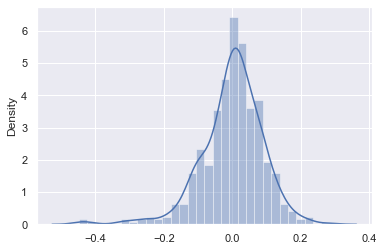

In [39]:
y_train_pred = lr_model.predict(X_train_sm)
res = y_train - y_train_pred
sns.distplot(res)

## Test Data

In [40]:
#num_vars = ['atemp','hum','windspeed','cnt','CR_ratio']
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [41]:
y_test=df_test.pop('cnt')
X_test=df_test

In [42]:
X_test_sm=sm.add_constant(X_test)

In [43]:
X_test_sm.shape

(220, 19)

In [44]:
# Remove the same variables in Test data as well 

X_test_sm = X_test_sm.drop(['sun', 'mon', 'tue','wed', 'thu','holiday','summer','hum'] , axis = 1 )

In [45]:
print(X_test_sm.shape)
print(X_train_sm.shape)

(220, 11)
(510, 11)


In [46]:
X_test_sm.head()

,const,yr,workingday,atemp,windspeed,mist,rain,spring,winter,sat,CR_ratio
184,1.0,0,0,0.769660,0.084219,1,0,0,0,0,0.987411
535,1.0,1,1,0.842587,0.153728,0,0,0,0,0,0.145773
299,1.0,0,1,0.496145,0.334206,1,0,0,1,0,0.083457
221,1.0,0,1,0.795343,0.339570,0,0,0,0,0,0.207566
152,1.0,0,1,0.741471,0.537414,0,0,0,0,0,0.156063


## Predict Test data

In [47]:
y_test_pred = lr_model.predict(X_test_sm)

## Calculate R Sq

In [48]:
r2_score(y_true = y_test, y_pred = y_test_pred)

0.8094395281983228

## Validate R2 with RMSE

In [49]:
rms = mean_squared_error(y_test, y_test_pred, squared=False)
rms

0.09545423857430178

# The below Model can be IGNORED

## Validate the already built above model with Bottom Up approach modelling (by adding variables incrementally)

In [50]:
X_train_sm=sm.add_constant(X_train['atemp'])
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.420
Model:                            OLS   Adj. R-squared:                  0.419
Method:                 Least Squares   F-statistic:                     367.6
Date:                Wed, 09 Nov 2022   Prob (F-statistic):           4.77e-62
Time:                        11:14:16   Log-Likelihood:                 177.73
No. Observations:                 510   AIC:                            -351.5
Df Residuals:                     508   BIC:                            -343.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1622      0.020      8.181      0.000       0.123       0.201
atemp          0.6846      0.036     19.173      0.000       0.614       0.755
==============================================================================
Omnibus:                        3.256   Durbin-Watson:                   2.102
Prob(Omnibus):                  0.196   Jarque-Bera (JB):                2.759
Skew:                           0.081   Prob(JB):                        0.252
Kurtosis:                       2.678   Cond. No.                         6.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
X_train_sm=sm.add_constant(X_train[['atemp','yr']])
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.697
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     582.7
Date:                Wed, 09 Nov 2022   Prob (F-statistic):          3.98e-132
Time:                        11:14:16   Log-Likelihood:                 343.25
No. Observations:                 510   AIC:                            -680.5
Df Residuals:                     507   BIC:                            -667.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0718      0.015      4.802      0.000       0.042       0.101
atemp          0.6259      0.026     24.092      0.000       0.575       0.677
yr             0.2373      0.011     21.524      0.000       0.216       0.259
==============================================================================
Omnibus:                       38.998   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.230
Skew:                          -0.546   Prob(JB):                     8.34e-14
Kurtosis:                       4.281   Cond. No.                         6.69
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
X_train_sm=sm.add_constant(X_train[['atemp','yr','CR_ratio']])
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     396.7
Date:                Wed, 09 Nov 2022   Prob (F-statistic):          1.93e-132
Time:                        11:14:16   Log-Likelihood:                 347.31
No. Observations:                 510   AIC:                            -686.6
Df Residuals:                     506   BIC:                            -669.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0642      0.015      4.256      0.000       0.035       0.094
atemp          0.5995      0.027     21.878      0.000       0.546       0.653
yr             0.2408      0.011     21.857      0.000       0.219       0.262
CR_ratio       0.0897      0.031      2.851      0.005       0.028       0.151
==============================================================================
Omnibus:                       41.483   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.808
Skew:                          -0.594   Prob(JB):                     6.25e-14
Kurtosis:                       4.204   Cond. No.                         8.11
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
X_train_sm=sm.add_constant(X_train[['atemp','yr','CR_ratio','workingday','winter','sat']])
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     274.4
Date:                Wed, 09 Nov 2022   Prob (F-statistic):          4.39e-155
Time:                        11:14:16   Log-Likelihood:                 409.25
No. Observations:                 510   AIC:                            -804.5
Df Residuals:                     503   BIC:                            -774.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1200      0.022     -5.468      0.000      -0.163      -0.077
atemp          0.5338      0.028     19.139      0.000       0.479       0.589
yr             0.2503      0.010     25.437      0.000       0.231       0.270
CR_ratio       0.3981      0.047      8.548      0.000       0.307       0.490
workingday     0.1655      0.019      8.607      0.000       0.128       0.203
winter         0.1046      0.012      9.033      0.000       0.082       0.127
sat            0.0558      0.017      3.278      0.001       0.022       0.089
==============================================================================
Omnibus:                      117.346   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              384.667
Skew:                          -1.051   Prob(JB):                     2.96e-84
Kurtosis:                       6.699   Cond. No.                         16.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
vif.columns

Index(['Features', 'VIF'], dtype='object')

In [55]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range (X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,20.58
4,workingday,3.46
3,CR_ratio,3.15
6,sat,1.62
1,atemp,1.50
5,winter,1.07
2,yr,1.04
